In [1]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

In [2]:
addresses = pd.read_csv("data/San_Francisco_Addresses_with_Units_-_Enterprise_Addressing_System_20250702.csv")

In [3]:
addresses.columns

Index(['EAS FullID', 'EAS BaseID', 'Address Number', 'Address Number Suffix',
       'Street Name', 'Street Type', 'Street Full Name', 'CNN', 'EAS SubID',
       'Unit Number', 'Parcel Number', 'Block', 'Lot', 'ZIP Code', 'Address',
       'Longitude', 'Latitude', 'point', 'supdist', 'numbertext', 'supervisor',
       'supdistpad', 'supname', 'nhood', 'complete_landmark_name',
       'landmark_aliases', 'direct_source', 'data_as_of', 'data_updated_at',
       'data_loaded_at', 'Analysis Neighborhoods', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts'],
      dtype='object')

In [4]:
addresses[addresses["EAS BaseID"] == 335008]

,EAS FullID,EAS BaseID,Address Number,Address Number Suffix,Street Name,Street Type,Street Full Name,CNN,EAS SubID,Unit Number,...,complete_landmark_name,landmark_aliases,direct_source,data_as_of,data_updated_at,data_loaded_at,Analysis Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts
192847,335008-550410-373418,335008,2301,NaN,CECILIA,AVE,CECILIA AVE,3854000,550410,NaN,...,NaN,NaN,SF DBI,2025/07/02 03:30:00 AM,1970/01/01 12:00:00 AM,2025/07/02 10:09:14 AM,41.0,44.0,10.0,8.0


[Text(0, 0, '122657'), Text(0, 0, '264257'), Text(0, 0, '950')]

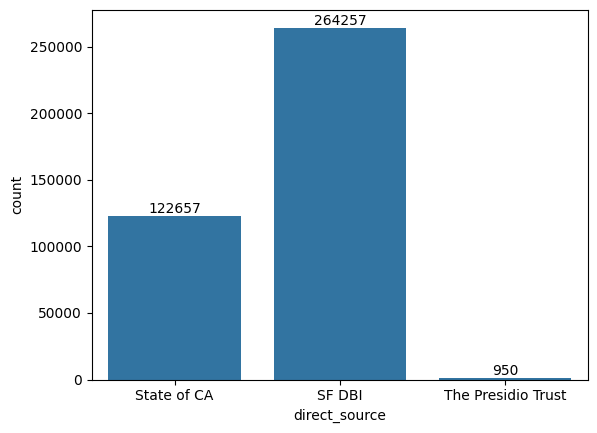

In [5]:
ax = sns.countplot(data=addresses, x="direct_source")
ax.bar_label(ax.containers[0])

# Temporal Data

## Seven Day Breakdown

In [6]:
addresses["data_updated_at"]

0         2019/06/14 06:50:33 PM
1         1970/01/01 12:00:00 AM
2         2019/06/14 06:50:33 PM
3         2019/06/04 06:48:20 PM
4         1970/01/01 12:00:00 AM
                   ...          
387859    1970/01/01 12:00:00 AM
387860    1970/01/01 12:00:00 AM
387861    1970/01/01 12:00:00 AM
387862    1970/01/01 12:00:00 AM
387863    1970/01/01 12:00:00 AM
Name: data_updated_at, Length: 387864, dtype: object

In [7]:
last_update_timestamp = pd.to_datetime(addresses["data_updated_at"], format = "%Y/%m/%d %H:%M:%S %p")
last_update_timestamp

0        2019-06-14 06:50:33
1        1970-01-01 12:00:00
2        2019-06-14 06:50:33
3        2019-06-04 06:48:20
4        1970-01-01 12:00:00
                 ...        
387859   1970-01-01 12:00:00
387860   1970-01-01 12:00:00
387861   1970-01-01 12:00:00
387862   1970-01-01 12:00:00
387863   1970-01-01 12:00:00
Name: data_updated_at, Length: 387864, dtype: datetime64[ns]

In [8]:
datetime.today() - timedelta(days=7)

datetime.datetime(2025, 7, 3, 15, 15, 43, 368313)

In [9]:
datetime.today() - timedelta(days=30)

datetime.datetime(2025, 6, 10, 15, 15, 43, 384822)

In [10]:
week = (last_update_timestamp) >= (datetime.today() - timedelta(days=7))
month = (last_update_timestamp) >= (datetime.today() - timedelta(days=90))
print(week)

0         False
1         False
2         False
3         False
4         False
          ...  
387859    False
387860    False
387861    False
387862    False
387863    False
Name: data_updated_at, Length: 387864, dtype: bool


In [11]:
addresses["data_updated_at"] = last_update_timestamp

In [12]:
addresses[month].sort_values("data_updated_at", ascending = False)

,EAS FullID,EAS BaseID,Address Number,Address Number Suffix,Street Name,Street Type,Street Full Name,CNN,EAS SubID,Unit Number,...,complete_landmark_name,landmark_aliases,direct_source,data_as_of,data_updated_at,data_loaded_at,Analysis Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts
341120,456677-677436-599585,456677,114,A,POWELL,ST,POWELL ST,10676000,677436,NaN,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-07-01 03:25:42,2025/07/02 10:09:14 AM,8.0,19.0,6.0,3.0
69517,430338-788405-0,430338,1355,NaN,EDDY,ST,EDDY ST,5070000,788405,304,...,NaN,NaN,State of CA,2025/07/02 03:34:00 AM,2025-06-30 03:30:55,2025/07/02 10:09:14 AM,39.0,97.0,4.0,11.0
182332,430338-788398-0,430338,1355,NaN,EDDY,ST,EDDY ST,5070000,788398,201,...,NaN,NaN,State of CA,2025/07/02 03:34:00 AM,2025-06-30 03:30:55,2025/07/02 10:09:14 AM,39.0,97.0,4.0,11.0
319909,430338-788396-0,430338,1355,NaN,EDDY,ST,EDDY ST,5070000,788396,103,...,NaN,NaN,State of CA,2025/07/02 03:34:00 AM,2025-06-30 03:30:55,2025/07/02 10:09:14 AM,39.0,97.0,4.0,11.0
217951,430338-788394-0,430338,1355,NaN,EDDY,ST,EDDY ST,5070000,788394,101,...,NaN,NaN,State of CA,2025/07/02 03:34:00 AM,2025-06-30 03:30:55,2025/07/02 10:09:14 AM,39.0,97.0,4.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304338,459598-680362-599271,459598,700,NaN,VELASCO,AVE,VELASCO AVE,13195000,680362,NaN,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-04-15 09:28:47,2025/07/02 10:09:14 AM,40.0,74.0,9.0,9.0
350482,459597-680361-599268,459597,600,NaN,VELASCO,AVE,VELASCO AVE,13195000,680361,NaN,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-04-15 09:28:47,2025/07/02 10:09:14 AM,40.0,74.0,9.0,9.0
134599,395954-614162-599272,395954,1,NaN,BLYTHDALE,AVE,BLYTHDALE AVE,2996000,614162,NaN,...,NaN,NaN,SF DBI,2025/07/02 03:32:00 AM,2025-04-15 09:28:47,2025/07/02 10:09:14 AM,40.0,74.0,9.0,9.0
137756,474442-706362-599269,474442,602,NaN,VELASCO,AVE,VELASCO AVE,13195000,706362,NaN,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-04-15 09:28:47,2025/07/02 10:09:14 AM,40.0,74.0,9.0,9.0


In [13]:
addresses["data_updated_at"]< date.today().strftime("%Y/%m/%d %H:%M:%S %p")

0         True
1         True
2         True
3         True
4         True
          ... 
387859    True
387860    True
387861    True
387862    True
387863    True
Name: data_updated_at, Length: 387864, dtype: bool

In [14]:
start_str = "2025-06-02"
end_str = "2025-06-06"
start = datetime.strptime(start_str, "%Y-%m-%d").strftime("%Y/%m/%d %H:%M:%S %p")
end = datetime.strptime(end_str, "%Y-%m-%d").strftime("%Y/%m/%d %H:%M:%S %p")

In [15]:
mask = (addresses['data_updated_at'] >= start) & (addresses['data_updated_at'] <= end)

In [16]:
addresses.loc[mask].reset_index(drop= False)

,index,EAS FullID,EAS BaseID,Address Number,Address Number Suffix,Street Name,Street Type,Street Full Name,CNN,EAS SubID,...,complete_landmark_name,landmark_aliases,direct_source,data_as_of,data_updated_at,data_loaded_at,Analysis Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts
0,17,447398-668137-0,447398,2131,B,MASON,ST,MASON ST,8833000,668137,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-06-04 09:11:12,2025/07/02 10:09:14 AM,23.0,106.0,6.0,3.0
1,19,476172-709456-0,476172,3149,NaN,20TH,ST,20TH ST,1049000,709456,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-06-03 01:13:08,2025/07/02 10:09:14 AM,20.0,53.0,3.0,2.0
2,101,455561-676319-502142,455561,1645,NaN,18TH,ST,18TH ST,858000,676319,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-06-04 08:24:20,2025/07/02 10:09:14 AM,26.0,54.0,2.0,9.0
3,143,275078-480422-301326,275078,1185,NaN,ALABAMA,ST,ALABAMA ST,2117000,480422,...,NaN,NaN,SF DBI,2025/07/02 03:30:00 AM,2025-06-03 01:05:32,2025/07/02 10:09:14 AM,20.0,53.0,3.0,2.0
4,160,460183-680949-506923,460183,105,NaN,WEBSTER,ST,WEBSTER ST,13522000,680949,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-06-03 10:14:16,2025/07/02 10:09:14 AM,9.0,26.0,4.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,386997,452425-673183-499002,452425,2075,NaN,MISSION,ST,MISSION ST,9116000,673183,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-06-03 01:28:31,2025/07/02 10:09:14 AM,20.0,53.0,3.0,2.0
3739,387256,447870-668627-494400,447870,1075,NaN,BATTERY,ST,BATTERY ST,2766000,668627,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-06-03 10:32:04,2025/07/02 10:09:14 AM,8.0,77.0,6.0,3.0
3740,387351,427119-646901-470680,427119,1404,NaN,18TH,ST,18TH ST,856000,646901,...,NaN,NaN,SF DBI,2025/07/02 03:32:00 AM,2025-06-04 08:31:59,2025/07/02 10:09:14 AM,26.0,54.0,2.0,9.0
3741,387447,447079-667810-493533,447079,2755,NaN,TAYLOR,ST,TAYLOR ST,12465000,667810,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,2025-06-04 09:27:56,2025/07/02 10:09:14 AM,23.0,99.0,6.0,3.0


In [23]:
addresses["EAS BaseID"]

0         502113
1         478262
2         502122
3         360420
4         318393
           ...  
387859    372497
387860    391554
387861    471497
387862    328104
387863    456540
Name: EAS BaseID, Length: 387864, dtype: int64

# Spatial Data

## Geopandas

In [17]:
addresses.head()

,EAS FullID,EAS BaseID,Address Number,Address Number Suffix,Street Name,Street Type,Street Full Name,CNN,EAS SubID,Unit Number,...,complete_landmark_name,landmark_aliases,direct_source,data_as_of,data_updated_at,data_loaded_at,Analysis Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts
0,502113-849573-0,502113,1600,NaN,UNION,ST,UNION ST,12865000,849573,NaN,...,NaN,NaN,State of CA,2025/07/02 03:35:00 AM,2019-06-14 06:50:33,2025/07/02 10:09:14 AM,13.0,15.0,4.0,6.0
1,478262-713641-0,478262,166,NaN,29TH,ST,29TH ST,1630000,713641,NaN,...,NaN,NaN,SF DBI,2025/07/02 03:33:00 AM,1970-01-01 12:00:00,2025/07/02 10:09:14 AM,22.0,84.0,9.0,5.0
2,502122-849616-0,502122,1717,NaN,UNION,ST,UNION ST,12866000,849616,NaN,...,NaN,NaN,State of CA,2025/07/02 03:35:00 AM,2019-06-14 06:50:33,2025/07/02 10:09:14 AM,13.0,15.0,4.0,6.0
3,360420-768690-0,360420,5,NaN,BIRD,ST,BIRD ST,2973000,768690,4,...,NaN,NaN,State of CA,2025/07/02 03:34:00 AM,2019-06-04 06:48:20,2025/07/02 10:09:14 AM,20.0,37.0,3.0,5.0
4,318393-533718-0,318393,1467,NaN,48TH,AVE,48TH AVE,2068000,533718,NaN,...,NaN,NaN,SF DBI,2025/07/02 03:30:00 AM,1970-01-01 12:00:00,2025/07/02 10:09:14 AM,35.0,39.0,10.0,7.0


In [18]:
addresses_geom = gpd.GeoSeries.from_wkt(addresses["point"])

In [19]:
gdf = gpd.GeoDataFrame(data = addresses, geometry = addresses_geom, crs = "EPSG:4326")

In [20]:
gdf_day_to_day = gpd.GeoDataFrame(data = addresses[week], geometry = addresses_geom, crs = "EPSG:4326")

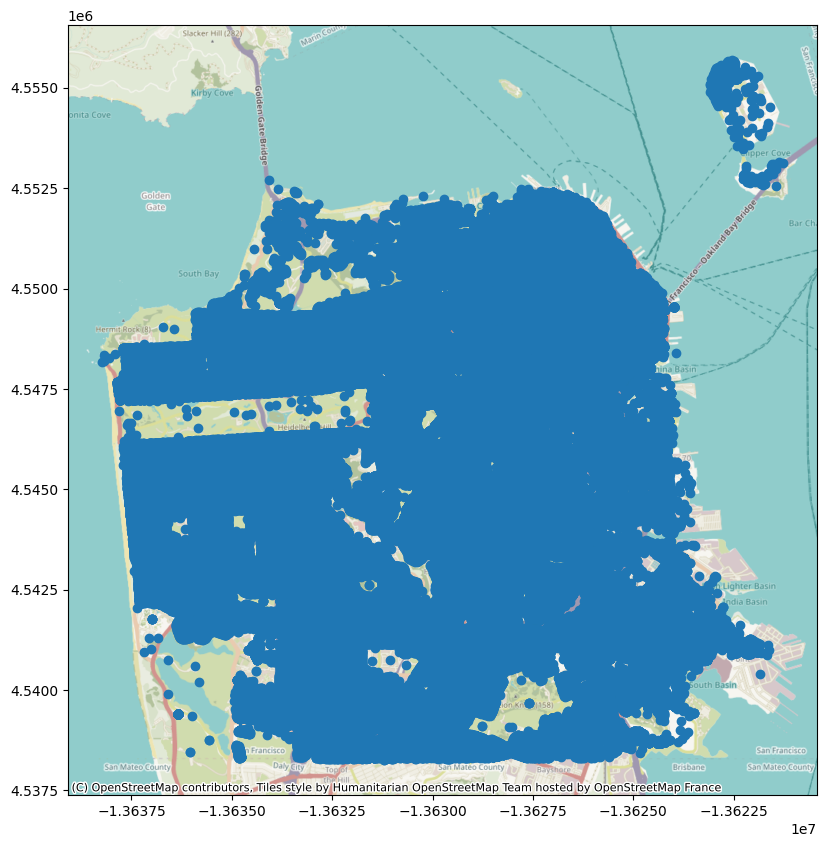

In [21]:
import geodatasets
import contextily as cx
ax = gdf_day_to_day.to_crs(epsg=3857).plot(figsize=(10, 10))
cx.add_basemap(ax)